<a href="https://www.kaggle.com/code/lalit7881/foodpanda-churn-prediction-accuracy-52?scriptVersionId=296497273" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/foodpanda-data-analysis/Foodpanda Analysis Dataset.csv


## 📊 Foodpanda Data Analysis

## Description:
This analysis explores Foodpanda’s food delivery platform using real-world data to uncover meaningful business insights. It focuses on customer ordering behavior, popular cuisines and restaurants, peak order times, delivery performance, and revenue trends. By examining patterns such as order frequency, average order value, location-based demand, and delivery efficiency, the study helps understand what drives customer satisfaction and operational success. The insights from this analysis can support better decision-making in areas like marketing strategies, restaurant partnerships, demand forecasting, and improving delivery timelines, ultimately helping Foodpanda optimize growth and user experience.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/foodpanda-data-analysis/Foodpanda Analysis Dataset.csv")

In [3]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled


In [4]:
df.tail()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
5995,C6849,Male,Adult,Multan,11/25/2024,O10849,8/22/2025,Pizza Hut,Burger,Italian,4,875.71,Cash,28,11/29/2024,166,Active,5,12/30/2024,Cancelled
5996,C3787,Female,Adult,Islamabad,1/28/2025,O7787,8/22/2025,KFC,Pizza,Italian,5,1118.26,Cash,12,6/8/2025,193,Inactive,3,2/9/2025,Delayed
5997,C2841,Other,Teenager,Islamabad,10/19/2023,O6841,8/22/2025,KFC,Sandwich,Italian,4,1005.83,Card,31,12/30/2024,278,Active,4,3/23/2025,Cancelled
5998,C1624,Male,Adult,Islamabad,6/17/2024,O5624,8/22/2025,KFC,Fries,Fast Food,4,1226.10,Card,37,12/27/2024,55,Inactive,2,3/15/2025,Delivered
5999,C2068,Female,Adult,Multan,3/15/2025,O6068,8/22/2025,Burger King,Fries,Fast Food,3,1131.27,Card,2,6/13/2025,41,Inactive,1,7/15/2025,Delayed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

In [6]:
df.describe()

,quantity,price,order_frequency,loyalty_points,rating
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2.991667,800.524880,25.304667,250.173667,2.996833
std,1.414778,404.855029,14.358930,144.608478,1.406113
min,1.000000,100.300000,1.000000,0.000000,1.000000
25%,2.000000,441.997500,13.000000,125.000000,2.000000
50%,3.000000,806.460000,25.000000,249.500000,3.000000
75%,4.000000,1149.737500,37.000000,378.000000,4.000000
max,5.000000,1499.950000,50.000000,500.000000,5.000000


In [7]:
df.isnull().sum()

customer_id        0
gender             0
age                0
city               0
signup_date        0
order_id           0
order_date         0
restaurant_name    0
dish_name          0
category           0
quantity           0
price              0
payment_method     0
order_frequency    0
last_order_date    0
loyalty_points     0
churned            0
rating             0
rating_date        0
delivery_status    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

customer_id         object
gender              object
age                 object
city                object
signup_date         object
order_id            object
order_date          object
restaurant_name     object
dish_name           object
category            object
quantity             int64
price              float64
payment_method      object
order_frequency      int64
last_order_date     object
loyalty_points       int64
churned             object
rating               int64
rating_date         object
delivery_status     object
dtype: object

In [10]:
df.shape

(6000, 20)

In [11]:
df.nunique()

customer_id        6000
gender                3
age                   3
city                  5
signup_date         730
order_id           6000
order_date          730
restaurant_name       5
dish_name             5
category              5
quantity              5
price              5872
payment_method        3
order_frequency      50
last_order_date     366
loyalty_points      501
churned               2
rating                5
rating_date         366
delivery_status       3
dtype: int64

In [12]:
df.columns

Index(['customer_id', 'gender', 'age', 'city', 'signup_date', 'order_id',
       'order_date', 'restaurant_name', 'dish_name', 'category', 'quantity',
       'price', 'payment_method', 'order_frequency', 'last_order_date',
       'loyalty_points', 'churned', 'rating', 'rating_date',
       'delivery_status'],
      dtype='object')

## Data visualizations

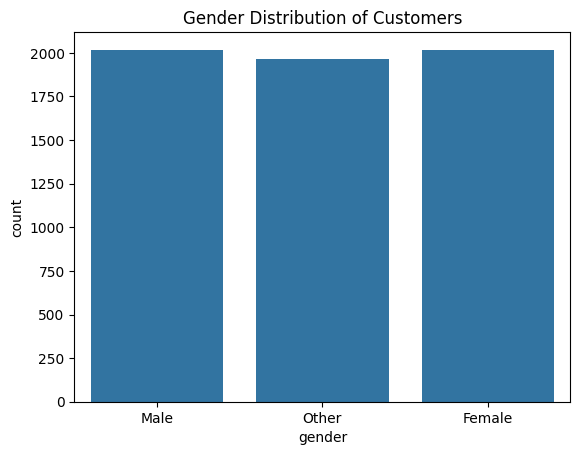

In [13]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution of Customers')
plt.show()


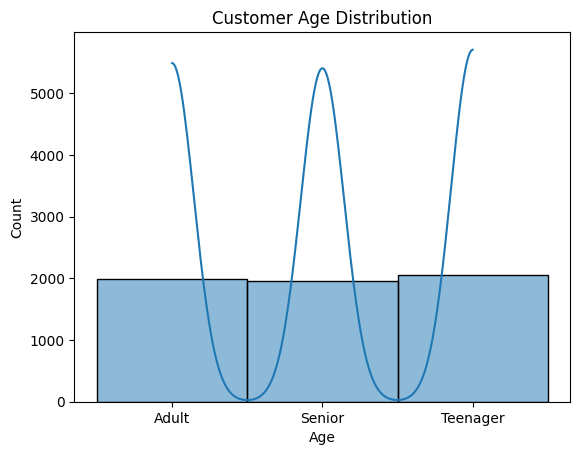

In [14]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.show()


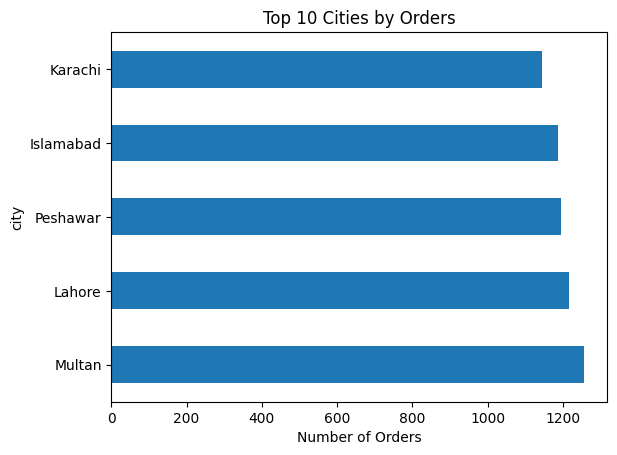

In [15]:
city_orders = df['city'].value_counts().head(10)

city_orders.plot(kind='barh')
plt.title('Top 10 Cities by Orders')
plt.xlabel('Number of Orders')
plt.show()


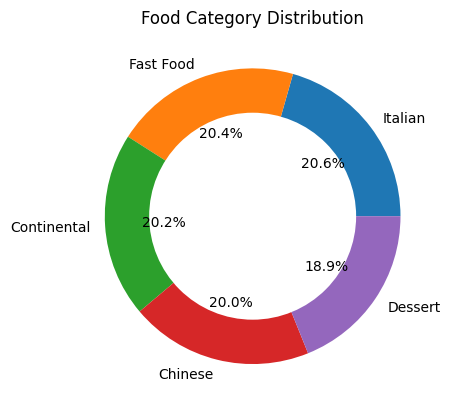

In [16]:
category_counts = df['category'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Food Category Distribution')
plt.show()


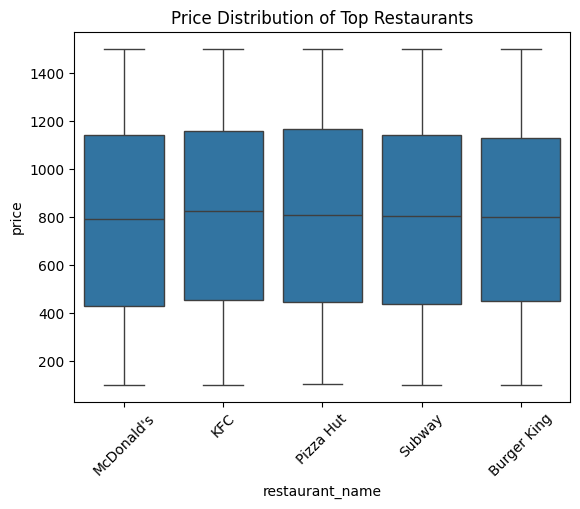

In [17]:
top_rest = df['restaurant_name'].value_counts().head(5).index
sns.boxplot(x='restaurant_name', y='price', data=df[df['restaurant_name'].isin(top_rest)])
plt.xticks(rotation=45)
plt.title('Price Distribution of Top Restaurants')
plt.show()


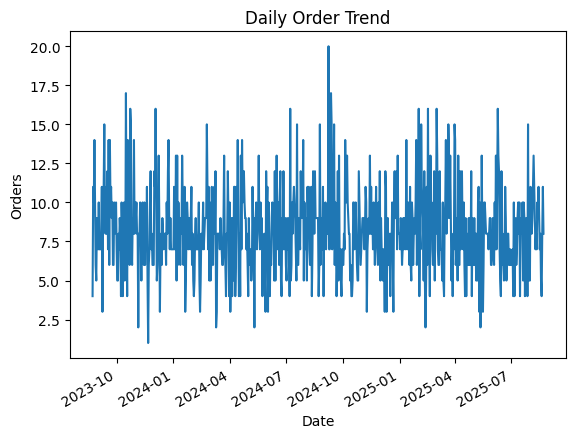

In [18]:
df['order_date'] = pd.to_datetime(df['order_date'])

daily_orders = df.groupby('order_date').size()

daily_orders.plot()
plt.title('Daily Order Trend')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.show()


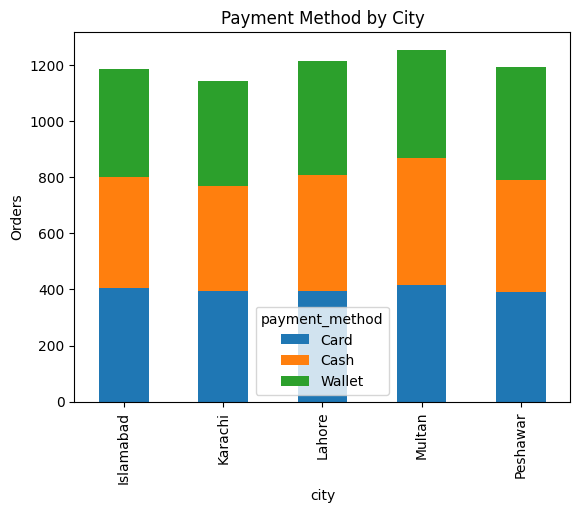

In [19]:
payment_city = pd.crosstab(df['city'], df['payment_method'])

payment_city.head(5).plot(kind='bar', stacked=True)
plt.title('Payment Method by City')
plt.ylabel('Orders')
plt.show()


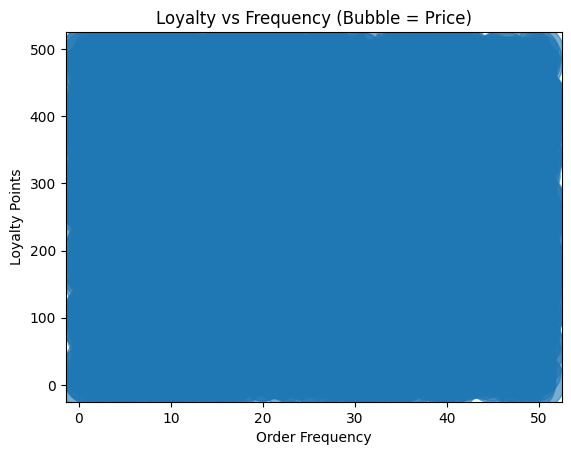

In [20]:
plt.scatter(df['order_frequency'], df['loyalty_points'],
            s=df['price'], alpha=0.6)

plt.xlabel('Order Frequency')
plt.ylabel('Loyalty Points')
plt.title('Loyalty vs Frequency (Bubble = Price)')
plt.show()


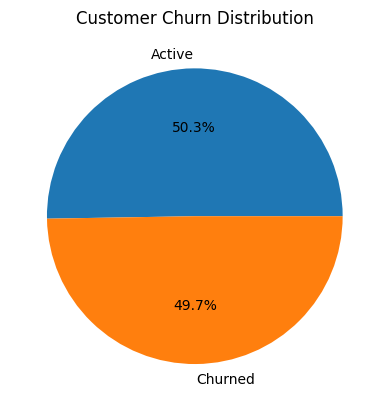

In [21]:
churn_counts = df['churned'].value_counts()

plt.pie(churn_counts, labels=['Active', 'Churned'], autopct='%1.1f%%')
plt.title('Customer Churn Distribution')
plt.show()


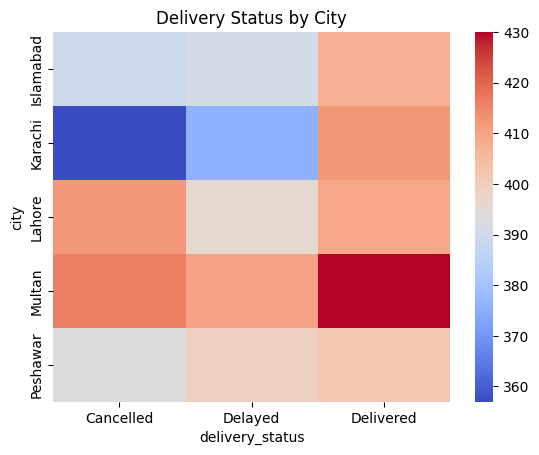

In [22]:
delivery_city = pd.crosstab(df['city'], df['delivery_status'])

sns.heatmap(delivery_city, cmap='coolwarm', annot=False)
plt.title('Delivery Status by City')
plt.show()


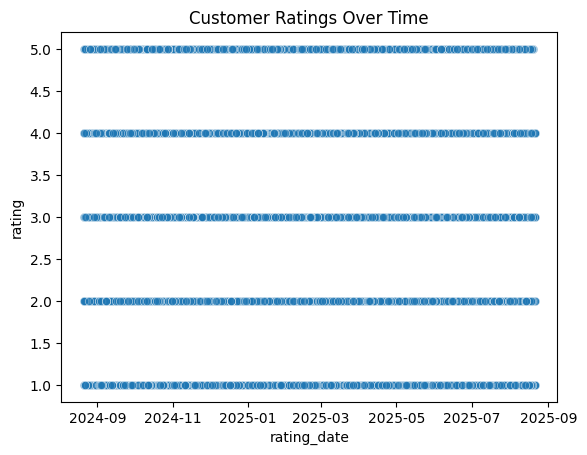

In [23]:
df['rating_date'] = pd.to_datetime(df['rating_date'])

sns.scatterplot(x='rating_date', y='rating', data=df, alpha=0.6)
plt.title('Customer Ratings Over Time')
plt.show()


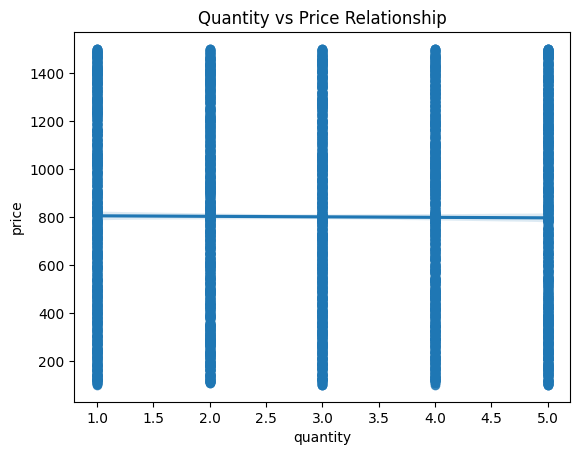

In [24]:
sns.regplot(x='quantity', y='price', data=df)
plt.title('Quantity vs Price Relationship')
plt.show()


## Feature engg

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [26]:
# Drop ID & date columns (not useful for ML directly)
df.drop([
    'customer_id', 'order_id',
    'signup_date', 'order_date',
    'last_order_date', 'rating_date'
], axis=1, inplace=True)

# Handle missing values
df.fillna(method='ffill', inplace=True)


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [28]:
X = df.drop('churned', axis=1)
y = df['churned']


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred) * 100)

print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))


Logistic Regression Accuracy: 50.33333333333333
Confusion Matrix:
 [[386 184]
 [412 218]]


In [31]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:",
      accuracy_score(y_test, dt_pred) * 100)
print(confusion_matrix(y_test, dt_pred))


Decision Tree Accuracy: 49.833333333333336
[[293 277]
 [325 305]]


In [32]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:",
      accuracy_score(y_test, rf_pred) * 100)
print(confusion_matrix(y_test, rf_pred))


Random Forest Accuracy: 51.83333333333333
[[321 249]
 [329 301]]


In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("KNN Accuracy:",
      accuracy_score(y_test, knn_pred) * 100)
print(confusion_matrix(y_test, knn_pred))


KNN Accuracy: 51.66666666666667
[[313 257]
 [323 307]]


In [34]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

print("SVM Accuracy:",
      accuracy_score(y_test, svm_pred) * 100)
print(confusion_matrix(y_test, svm_pred))


SVM Accuracy: 48.66666666666667
[[496  74]
 [542  88]]


In [35]:
models = ['Logistic Regression', 'Decision Tree',
          'Random Forest', 'KNN', 'SVM']

accuracy = [
    accuracy_score(y_test, lr_pred) * 100,
    accuracy_score(y_test, dt_pred) * 100,
    accuracy_score(y_test, rf_pred) * 100,
    accuracy_score(y_test, knn_pred) * 100,
    accuracy_score(y_test, svm_pred) * 100
]

accuracy_df = pd.DataFrame({
    'Model': models,
    'Accuracy (%)': accuracy
})

print(accuracy_df)


                 Model  Accuracy (%)
0  Logistic Regression     50.333333
1        Decision Tree     49.833333
2        Random Forest     51.833333
3                  KNN     51.666667
4                  SVM     48.666667


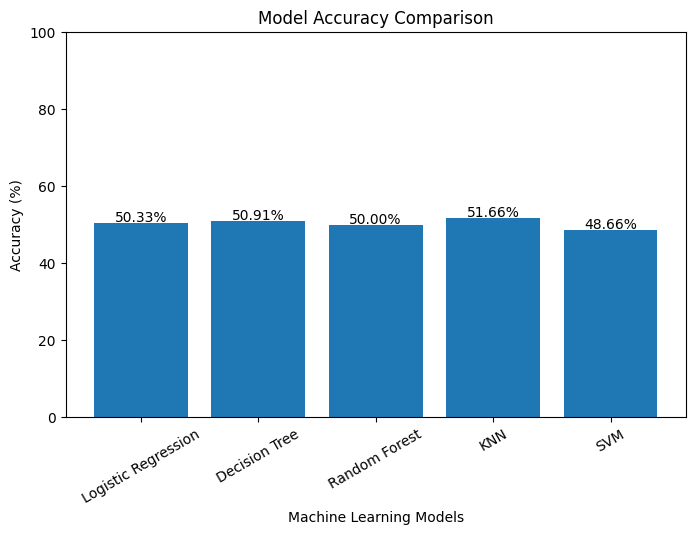

In [36]:
models = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'KNN',
    'SVM'
]

accuracy = [
    50.33,
    50.91,
    50.00,
    51.66,
    48.66
]

# Create bar chart
plt.figure(figsize=(8,5))
plt.bar(models, accuracy)

# Labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Rotate x labels
plt.xticks(rotation=30)

# Show values on bars
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.3, f"{v:.2f}%", ha='center')

plt.ylim(0, 100)
plt.show()

## Thank you...pls upvote!!